In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from script.machine_learning_model import *
import gc
import os 
os.makedirs("out", exist_ok = True)
model_types = ["conv", "prop", "prop2"]

In [19]:
!python script/convert.py

In [14]:
!python script/EDA.py

/Users/takaomotoshi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/takaomotoshi/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/takaomotoshi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/takaomotoshi/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8451 missing from current font.
  font.set_text(s, 0, flags=flags)


In [ ]:
ret = {}
rmse = {}
cvf = KFold(n_splits = 10 ,random_state =1126, shuffle = True)
for model_type in ["conv", "prop", "prop2"]:
    model_run(ret, rmse, model_type, cvf)

In [ ]:
errors =pd.DataFrame()
for j in ["conv", "prop", "prop2"]:
    for i in ["RFR", "ETR"]:
        a =ret[f"{i}_{j}"]["trn_mean"]
        b = ret[f"{i}_{j}"]["trn_std"]
        errors.at["train",f"{i}_{j}"] = f"{a : .2f} ({b: .2f})"
        a =ret[f"{i}_{j}"]["tes_mean"]
        b = ret[f"{i}_{j}"]["tes_std"]
        errors.at["test", f"{i}_{j}"] = f"{a : .2f} ({b: .2f})"
        a  = ret[f"{i}_{j}"]["tes_r2"]
        errors.at["r2", f"{i}_{j}"] = f"{a : .3f}"
errors.to_csv("out/errors.csv")
best_reg = min(rmse).split("_")[0]
best_reg

In [ ]:
best_reg = "ETR"

In [ ]:
gs = gridsearch()
feat, target = data_load("conv", option = True)
model = gs.best_model_(best_reg, feat, target )
plot_importance(model, feat.columns, 20, fname = "Figure_5_1")

feat, target = data_load("conv")
model = gs.best_model_(best_reg, feat, target )
one_shot_plot(feat, target,model, fname = "Figure_4_1")
plot_importance(model, feat.columns, 20, fname = "Figure_5_2")

feat, target = data_load("prop", option = True)
model = gs.best_model_(best_reg, feat, target )
plot_importance(model, feat.columns, 20, fname = "Figure_S5_1")

feat, target = data_load("prop")
model = gs.best_model_(best_reg, feat, target )
one_shot_plot(feat, target,model, fname = "Figure_4_2")
plot_importance(model, feat.columns, 20, fname = "Figure_S5_2")

feat, target = data_load("prop2", option = True)
model = gs.best_model_(best_reg, feat, target )
plot_importance(model, feat.columns, 20, fname = "Figure_S6_1")

feat, target = data_load("prop2")
model = gs.best_model_(best_reg, feat, target )
one_shot_plot(feat, target, model, fname = "Figure_4_3")
plot_importance(model, feat.columns, 20, fname = "Figure_S6_2")

In [3]:
!python script/ptable_trends.py out/elements.csv

In [1]:
!python script/ptable_trends.py out/elements_.csv

In [5]:
excel = pd.read_excel('data/OCM.xlsx')

desc = pd.read_csv('data/Descriptors.csv',skiprows = [0],index_col='symbol').drop(['Unnamed: 0','AN',
                                                                               'name','period',
                                                                               'ionic radius',
                                                                               'covalent radius','group',
                                                                               'VdW radius','m. p.','b. p.',
                                                                               'crystal radius',
                                                                               'a x 106 ',
                                                                               'Heat capacity ',
                                                                               'l',
                                                                               'electron affinity ',
                                                                               'VE', 
                                                                               'Surface energy '],axis=1)
desc=desc.fillna(desc.mean())

#componet elements convert
elements = pd.DataFrame(columns = list(desc.index))
for i in range(excel.shape[0]):
    elements.loc[i,'%s'%(excel.loc[i,'Cation 1'])] = excel.loc[i,'Cation 1 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 2'])] = excel.loc[i,'Cation 2 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 3'])] = excel.loc[i,'Cation 3 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 4'])] = excel.loc[i,'Cation 4 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 5'])] = excel.loc[i,'Cation 5 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 6'])] = excel.loc[i,'Cation 6 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Anion 1'])] = excel.loc[i,'Anion 1 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Anion 2'])] = excel.loc[i,'Anion 2 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Support 1'])] = excel.loc[i,'Support 1 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Support 2'])] = excel.loc[i,'Support 2 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Support 3'])] = excel.loc[i,'Support 3 mol%']

elements = elements.drop('nan', axis = 1)
elements = elements.fillna('0')    

prom = pd.DataFrame()
for i in range(excel.shape[0]):
    prom.loc[i,'Promotor_%s'%(excel.loc[i,'Promotor'])] = 1
prom = prom.drop('Promotor_nan', axis = 1).fillna(0)
prom = prom.fillna(0)

prep = pd.DataFrame()
for i in range(excel.shape[0]):
	prep.loc[i,'%s'%excel.loc[i,'Preparation']] = 1
prep = prep.drop('n.a.', axis = 1)
prep = prep.fillna(0)   

In [7]:


desc = pd.read_csv('data/Descriptors.csv',skiprows = [0],index_col='symbol').drop(['Unnamed: 0','AN',
                                                                               'name','period',
                                                                               'ionic radius',
                                                                               'covalent radius','group',
                                                                               'VdW radius','m. p.','b. p.',
                                                                               'crystal radius',
                                                                               'a x 106 ',
                                                                               'Heat capacity ',
                                                                               'l',
                                                                               'electron affinity ',
                                                                               'VE', 
                                                                               'Surface energy '],axis=1)
desc=desc.fillna(desc.mean())

#componet elements convert
elements = pd.DataFrame(columns = list(desc.index))
for i in range(excel.shape[0]):
    elements.loc[i,'%s'%(excel.loc[i,'Cation 1'])] = excel.loc[i,'Cation 1 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 2'])] = excel.loc[i,'Cation 2 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 3'])] = excel.loc[i,'Cation 3 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 4'])] = excel.loc[i,'Cation 4 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 5'])] = excel.loc[i,'Cation 5 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Cation 6'])] = excel.loc[i,'Cation 6 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Anion 1'])] = excel.loc[i,'Anion 1 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Anion 2'])] = excel.loc[i,'Anion 2 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Support 1'])] = excel.loc[i,'Support 1 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Support 2'])] = excel.loc[i,'Support 2 mol%']
    elements.loc[i,'%s'%(excel.loc[i,'Support 3'])] = excel.loc[i,'Support 3 mol%']

elements = elements.drop('nan', axis = 1)
elements = elements.fillna('0')    

prom = pd.DataFrame()
for i in range(excel.shape[0]):
    prom.loc[i,'Promotor_%s'%(excel.loc[i,'Promotor'])] = 1
prom = prom.drop('Promotor_nan', axis = 1).fillna(0)
prom = prom.fillna(0)

prep = pd.DataFrame()
for i in range(excel.shape[0]):
	prep.loc[i,'%s'%excel.loc[i,'Preparation']] = 1
prep = prep.drop('n.a.', axis = 1)
prep = prep.fillna(0)

In [9]:
data = pd.concat([excel.loc[:,'Nr of publication'],elements,prom, prep,
                    excel.loc[:,'Temperature, K':]], axis = 1).astype('float')

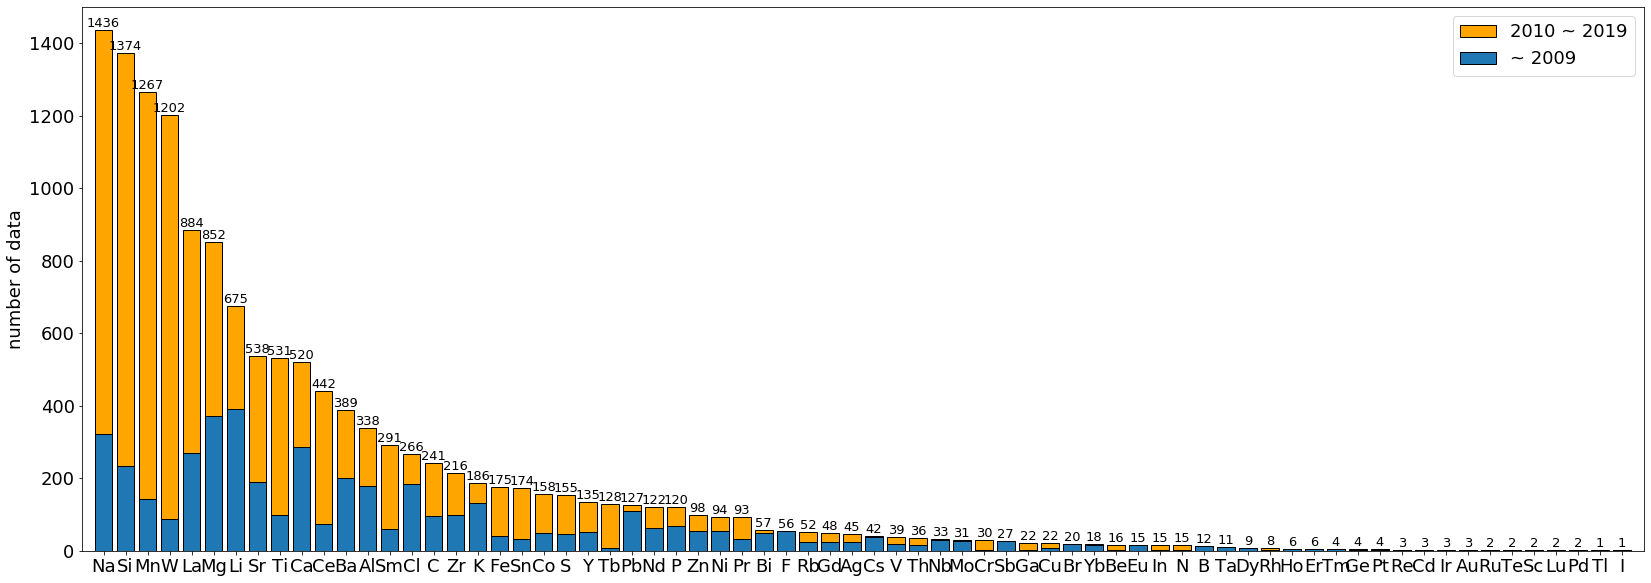

In [11]:
plt.figure(figsize = (28, 10))
plt.rcParams["font.size"] = 18
bar = (data.loc[:,"Li":'Th'] > 0).sum()

bar_ = (data.loc[(data.loc[:,'Nr of publication'] <421),'Li':'Th'] > 0).sum()
topk = 70
labels = bar.index
indices = np.argsort(bar)[::-1]
topk_idx = indices[:topk]
plt.bar(range(len(topk_idx)), bar[topk_idx], color = 'orange', align = 'center', ec = 'black', label = '2010 ~ 2019')
plt.bar(range(len(topk_idx)), bar_.loc[labels[topk_idx]], ec = 'black', label = '~ 2009')
#plt.xticks(range(len(topk_idx)))
plt.xticks(range(len(topk_idx)),labels[topk_idx])
plt.legend()
plt.ylabel('number of data')
plt.xlim([-1, len(topk_idx)])
plt.ylim([0,1500])
for x, y in zip(range(len(topk_idx)), bar[topk_idx]):
    plt.text(x, y, y, ha = "center", va ="bottom", fontsize = 13)
plt.savefig("out/elements.png", format = "png",  dpi = 1000)

In [16]:
import sklearn
import xgboost
print(sklearn.__version__)
print(xgboost.__version__)

0.22.1
0.90
